# Linear Regression as a Neural Network
This notebook introduces linear regression as a simple neural network and demonstrates how it can be fitted using gradient descent. We'll go through: 
- Data generation
- Visualisation
- Defining the model
- Loss function
- Gradient Descent algorithm
- Fitting the model and plotting convergence
- Manual training loop in Python


In [27]:
import numpy as np
import matplotlib.pyplot as plt


## Generate a simple dataset

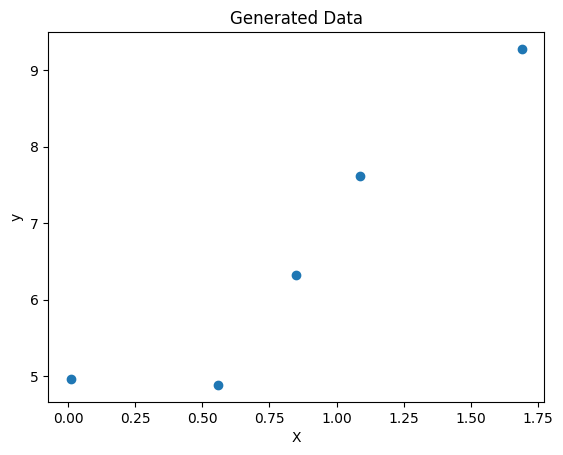

X: [1.09 0.56 0.85 1.69 0.01]
y: [7.62 4.88 6.32 9.28 4.96]


In [28]:
np.random.seed(100)
X = 2 * np.random.rand(5, 1)
y = 4 + 3 * X + np.random.randn(5, 1)
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()
print("X:", np.round(X.flatten(), 2))
print("y:", np.round(y.flatten(), 2))

We want to use the equation: y = b + w * X + e
We will choose some values of b and w and look at the values of the residual sum of squares

In [29]:
b = 1
w = 1
sum_of_squares = np.sum((y - (b + w * X)) ** 2)
print(f"Residual sum of squares for b={b}, w={w}: {sum_of_squares:.2f}")
b = 5
w = 0.5
sum_of_squares = np.sum((y - (b + w * X)) ** 2)
print(f"Residual sum of squares for b={b}, w={w}: {sum_of_squares:.2f}")


Residual sum of squares for b=1, w=1: 120.61
Residual sum of squares for b=5, w=0.5: 17.02


## Linear Model
We model the line as $y = wX + b$

In [30]:
def predict(X, w, b):
    return w * X + b

## Loss Function: Mean Squared Error

In [31]:
def rmse(y_true, y_pred):
    return np.sqrt((y_true - y_pred) ** 2).mean()

## Gradient Descent Step

In [32]:
def compute_gradients(X, y, w, b):
    y_pred = predict(X, w, b)
    error = y_pred - y
    dw = (2 * (error * X).mean())
    db = (2 * error.mean())
    return dw, db

## Training the Model using Gradient Descent

In [33]:
w, b = 0.0, 0.0
lr = 0.1
epochs = 100
losses = []
weights = []
biases = []

for epoch in range(epochs):
    dw, db = compute_gradients(X, y, w, b)
    w -= lr * dw
    b -= lr * db
    loss = rmse(y, predict(X, w, b))
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}, w: {w:.4f}, b: {b:.4f}')
    losses.append(loss)
    weights.append(w)
    biases.append(b)

Epoch 0, Loss: 4.2132, w: 1.2831, b: 1.3222
Epoch 10, Loss: 0.4818, w: 3.2919, b: 3.7252
Epoch 20, Loss: 0.4780, w: 3.1685, b: 3.8940
Epoch 30, Loss: 0.4856, w: 3.0653, b: 3.9984
Epoch 40, Loss: 0.4910, w: 2.9919, b: 4.0724
Epoch 50, Loss: 0.4949, w: 2.9398, b: 4.1249
Epoch 60, Loss: 0.4977, w: 2.9028, b: 4.1622
Epoch 70, Loss: 0.4996, w: 2.8765, b: 4.1887
Epoch 80, Loss: 0.5010, w: 2.8579, b: 4.2075
Epoch 90, Loss: 0.5020, w: 2.8446, b: 4.2209


## Plotting the Fit

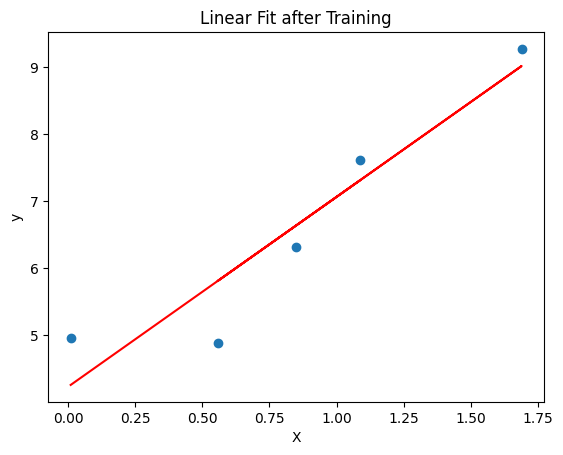

In [34]:
plt.scatter(X, y)
plt.plot(X, predict(X, w, b), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Fit after Training')
plt.show()

## Loss Curve

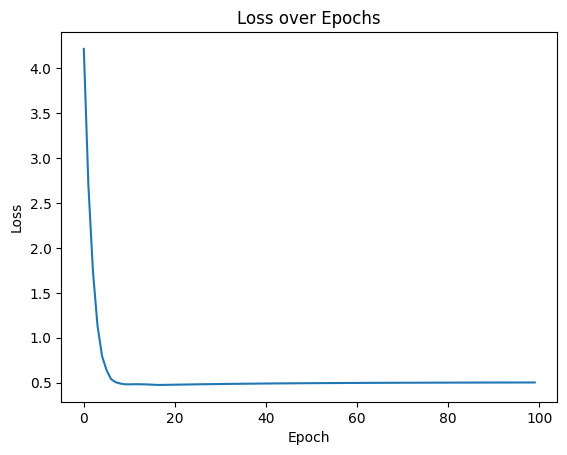

In [35]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

## Parameter trajectory
Look at how the parameters have moved in space


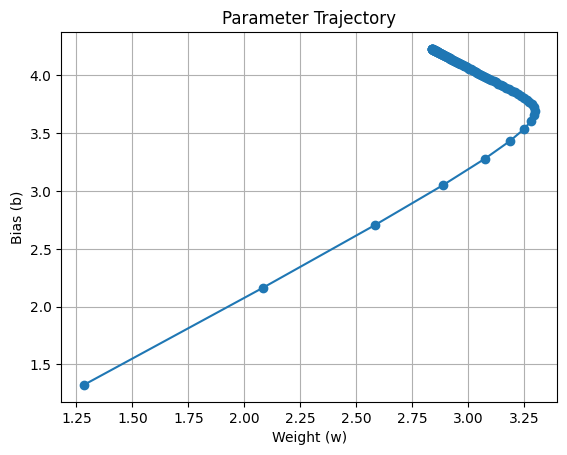

In [36]:
plt.plot(weights, biases, marker='o')
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Parameter Trajectory')
plt.grid()
plt.show()

## Try it Yourself!
Try changing the learning rate or number of epochs and see how it affects convergence.